In [11]:



from data_util.fetch_update_data_by_xlsx import read_ths_xlsx_to_df
import pandas as pd

df = pd.read_csv('../temp/Table1221.xls', encoding='gbk', sep='\t')
print(df.columns)


Index(['.', '代码', '    名称', '..1', '涨幅', '现价', '振幅', '涨跌', '连续涨停天数[20211221]',
       '涨停原因类别[20211221]', '涨速', '所属行业', '总金额', '总市值', '总手', '换手', '实体涨幅',
       'TTM市盈率', '现均差%', '委比%', '流通市值', '流通比例', '内盘', '外盘', '内外比', '利空', '利好',
       '细分行业', '主力净量', '量比', '净利润?', '市净率', '每股盈利', '昨收', '开盘', '开盘涨幅', '最高',
       '最低', '5日涨幅', '10日涨幅', '20日涨幅', '年初至今', '买量', '卖量', '笔数', '贡献度', '机构动向',
       '异动类型', '总股本', '流通股本', '利润总额', '净利润增长率', '每股净资产', '金叉个数',
       '流通股合计占总股本比例%[20211220]', '首次涨停时间[20211221]', '最终涨停时间[20211221]',
       '涨停封单额[20211221]', '涨停封成比%[20211221]', '涨停开板次数[20211221]',
       '流通市值[20211221]', 'Unnamed: 61'],
      dtype='object')


In [2]:
df = df[['代码', '开盘', '最高', '最低', '现价', '昨收', '总金额', '总市值', '总手', '换手', '涨幅', '所属行业']]

# df = df[df['总市值']>0]
cols = ['开盘', '最高', '最低', '现价', '昨收', '总金额', '换手', '涨幅', '总手', '总市值']

df['换手'] = df['换手'].str.rstrip('%')
df['涨幅'] = df['涨幅'].str.rstrip('%')


for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    pass


print(df.dtypes)
print(df.head(11))


代码       object
开盘      float64
最高      float64
最低      float64
现价      float64
昨收      float64
总金额     float64
总市值     float64
总手      float64
换手      float64
涨幅      float64
所属行业     object
dtype: object
          代码     开盘     最高     最低     现价     昨收           总金额           总市值  \
0   SZ000001  17.49  17.71  17.48  17.59  17.52  1.572896e+09  3.413501e+11   
1   SZ000002  19.49  20.67  19.44  20.31  19.56  3.232650e+09  2.361115e+11   
2   SZ000004  18.98  19.48  18.93  19.17  18.91  3.817334e+07  2.990578e+09   
3   SZ000005   2.22   2.28   2.22   2.27   2.22  2.459805e+07  2.402879e+09   
4   SZ000006   4.41   4.80   4.39   4.72   4.38  2.492075e+08  6.371977e+09   
5   SZ000007   5.70   5.75   5.57   5.62   5.71  3.241928e+07  1.947038e+09   
6   SZ000008   2.43   2.71   2.35   2.71   2.46  2.873330e+08  7.535955e+09   
7   SZ000009  14.83  15.07  14.68  15.03  14.96  1.012825e+09  3.876559e+10   
8   SZ000010   3.79   3.99   3.78   3.95   3.78  7.530275e+07  3.238426e+09   
9   

In [3]:

df = df[df['总市值'] > 0]

df['总市值'] = df['总市值'] / 1e8
print(df)

            代码      开盘      最高      最低      现价      昨收           总金额  \
0     SZ000001   17.49   17.71   17.48   17.59   17.52  1.572896e+09   
1     SZ000002   19.49   20.67   19.44   20.31   19.56  3.232650e+09   
2     SZ000004   18.98   19.48   18.93   19.17   18.91  3.817334e+07   
3     SZ000005    2.22    2.28    2.22    2.27    2.22  2.459805e+07   
4     SZ000006    4.41    4.80    4.39    4.72    4.38  2.492075e+08   
...        ...     ...     ...     ...     ...     ...           ...   
4608  SH688799   38.10   38.47   37.84   38.28   38.00  1.213842e+07   
4609  SH688800  129.41  142.74  125.77  141.50  129.53  1.125063e+08   
4610  SH688819   42.80   43.13   42.50   42.97   42.39  6.945402e+07   
4611  SH688981   52.96   53.13   52.83   53.08   52.87  7.812183e+08   
4612  SH689009   62.03   65.05   61.50   63.38   62.43  2.672158e+08   

              总市值           总手    换手    涨幅    所属行业  
0     3413.501000   89373404.0  0.46  0.40      银行  
1     2361.115400  159263250.

In [4]:
inds = df['所属行业'].drop_duplicates()
print(inds)


0           银行
1        房地产开发
2        计算机应用
3           环保
5           零售
         ...  
1022      农业服务
1050     电子化学品
1210      专业服务
1308    其他社会服务
3906     非金属材料
Name: 所属行业, Length: 78, dtype: object


In [5]:
indmv = []

for ind in inds:
    dfind = df[df['所属行业'] == ind]

    mv = sum(dfind['总市值'])
    indmv.append((ind, mv))

print(indmv)


[('银行', 100908.75976), ('房地产开发', 17878.268547), ('计算机应用', 27863.550281000014), ('环保', 8712.665686999999), ('零售', 10357.317637999995), ('非汽车交运', 6464.319573999999), ('电力设备', 82873.09169299997), ('建筑装饰', 18420.276277799992), ('建筑材料', 13418.653398000004), ('黑色家电', 1328.1418199999998), ('农产品加工', 7513.322930700001), ('光学光电子', 12492.168722999999), ('消费电子', 18080.976133), ('汽车服务', 1175.8142329999998), ('家用轻工', 8118.959813), ('电力', 28142.768776), ('医药商业', 3328.4202230000005), ('汽车零部件', 17961.211795999996), ('通信设备', 8876.310581000002), ('综合', 1278.4066026), ('通用设备', 9127.541922000002), ('保险及其他', 5327.345722999999), ('石油加工贸易', 18983.503218), ('工业金属', 12304.6883309), ('其他电子', 2589.2988990000003), ('计算机设备', 11484.129234000004), ('港口航运', 9450.148662), ('机场航运', 6086.48328), ('医疗服务', 14994.842057000002), ('贸易', 1365.791098), ('化学制药', 18776.018615600005), ('传媒', 14679.585775600002), ('专用设备', 16603.504863199996), ('证券', 37130.804088000004), ('化工合成材料', 9291.983171999997), ('白色家电', 12534.867828), ('生物制品'

In [6]:
indmv.sort(key=lambda x: x[1], reverse=True)
print(indmv)


[('银行', 100908.75976), ('电力设备', 82873.09169299997), ('饮料制造', 56448.28025599999), ('半导体及元件', 40709.639927999975), ('证券', 37130.804088000004), ('电力', 28142.768776), ('计算机应用', 27863.550281000014), ('国防军工', 25463.298351999994), ('化学制品', 25384.592351000003), ('保险', 24077.371872), ('汽车整车', 22218.966350000002), ('医疗器械', 19021.891505999996), ('石油加工贸易', 18983.503218), ('化学制药', 18776.018615600005), ('建筑装饰', 18420.276277799992), ('消费电子', 18080.976133), ('汽车零部件', 17961.211795999996), ('房地产开发', 17878.268547), ('专用设备', 16603.504863199996), ('食品加工制造', 15953.335097), ('医疗服务', 14994.842057000002), ('传媒', 14679.585775600002), ('生物制品', 14185.083411999998), ('建筑材料', 13418.653398000004), ('小金属', 13287.091264000002), ('煤炭开采加工', 12649.691706999998), ('白色家电', 12534.867828), ('光学光电子', 12492.168722999999), ('工业金属', 12304.6883309), ('钢铁', 12133.142242), ('计算机设备', 11484.129234000004), ('中药', 11132.585578100001), ('零售', 10357.317637999995), ('港口航运', 9450.148662), ('化工合成材料', 9291.983171999997), ('化学原料', 9129.215606

In [7]:
indcount = len(indmv)
print(indcount)

indstockcount = {}
inddfs = {}
for ind in indmv:
    inddf = df[df['所属行业'] == ind[0]]
    indstockcount[ind[0]] = inddf.shape[0]
    inddfs[ind[0]] = inddf

print(indstockcount)


78
{'银行': 41, '电力设备': 281, '饮料制造': 46, '半导体及元件': 129, '证券': 48, '电力': 92, '计算机应用': 216, '国防军工': 116, '化学制品': 187, '保险': 7, '汽车整车': 23, '医疗器械': 102, '石油加工贸易': 24, '化学制药': 132, '建筑装饰': 139, '消费电子': 81, '汽车零部件': 180, '房地产开发': 111, '专用设备': 173, '食品加工制造': 71, '医疗服务': 40, '传媒': 138, '生物制品': 41, '建筑材料': 77, '小金属': 35, '煤炭开采加工': 34, '白色家电': 32, '光学光电子': 95, '工业金属': 61, '钢铁': 44, '计算机设备': 69, '中药': 71, '零售': 77, '港口航运': 31, '化工合成材料': 100, '化学原料': 53, '通用设备': 140, '通信设备': 77, '环保': 120, '物流': 45, '自动化设备': 63, '家用轻工': 89, '农产品加工': 33, '公路铁路运输': 35, '通信服务': 31, '非汽车交运': 43, '机场航运': 12, '养殖业': 27, '保险及其他': 33, '美容护理': 29, '服装家纺': 62, '医药商业': 28, '小家电': 20, '油气开采及服务': 20, '纺织制造': 34, '其他电子': 32, '金属新材料': 23, '包装印刷': 40, '燃气': 27, '贵金属': 10, '电子化学品': 23, '仪器仪表': 39, '专业服务': 22, '种植业与林业': 21, '造纸': 22, '互联网电商': 15, '贸易': 19, '黑色家电': 11, '教育': 21, '综合': 32, '汽车服务': 14, '酒店及餐饮': 11, '景点及旅游': 22, '农业服务': 13, '厨卫电器': 9, '非金属材料': 6, '房地产服务': 8, '其他社会服务': 3}


In [8]:
import math

sumindstockcount = sum(indstockcount.values())
maxindstockcount = max(indstockcount.values())
industrycount = len(indmv)
print('sumindstockcount', sumindstockcount)
print('maxindstockcount', maxindstockcount)
print('industrycount', industrycount)

sumindstockcount 4581
maxindstockcount 281
industrycount 78


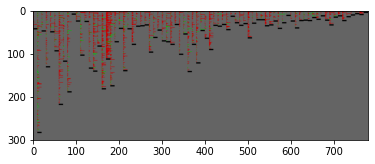

In [9]:
from PIL import Image, ImageDraw

width = industrycount * 10
height = maxindstockcount + 20

img = Image.new('RGB', size=(width, height), color=(100,100,100))
px = img.load()


for ind in indmv:
    col = indmv.index(ind)

    industry = ind[0]
    inddf = inddfs[industry]
    if not inddf.empty:
        inddf.sort_values(by='总市值', ascending=False)
        for row in range(inddf.shape[0]):
            pct = inddf['涨幅'].values[row]
            c = (200,0,0) if pct > 0 else (0,200,0)
            #print(row, col, pct, c)
            if pct > 9.9 or pct < -9.9 or math.isnan(pct):
                for i in range(10):
                    px[col * 10 + i, row] = c
                pass
            else:
                pct = int(pct)
                for i in range(abs(pct)):
                    px[col * 10 + i, row] = c
            pass
        for i in range(10):
            px[col * 10 + i, inddf.shape[0]+1] = (0,0,0)
            px[col * 10 + i, inddf.shape[0]+2] = (0,0,0)
            px[col * 10 + i, inddf.shape[0]+3] = (0,0,0)
img.save('test.bmp')
# img.show()
import matplotlib.pyplot as plt

plt.imshow(img)


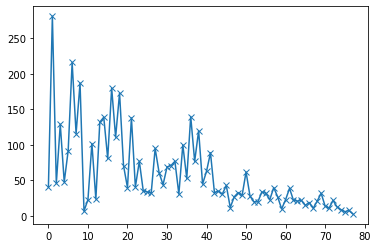

In [10]:
import matplotlib.pyplot as plt



plt.plot([inddf.shape[0] for inddf in inddfs.values()], '-x')
plt.show()







